In [2]:
from numpy import sin, cos
from scipy.integrate import solve_ivp
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.8
L1 = 1.0
L2 = 1.0
M1 = 1.0
M2 = 1.0

In [3]:
def eom(t, state):
    
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    
    delta = state[2] - state[0]
    den1 = (M1+M2)*L1 -M2*L1*cos(delta)*cos(delta)
    dydx[1] = ((M2*L1*state[1]*state[1]*sin(delta)*cos(delta) + M2*g*sin(state[2])*cos(delta) + M2*L2*state[3]*state[3]*sin(delta) - (M1+M2)*g*sin(state[0]))/ den1)
    
    dydx[2] = state[3]
    
    den2 = (L2/L1)*den1
    dydx[3] = ((-M2*L2*state[3]*state[3]*sin(delta)*cos(delta) + (M1+M2)*g*sin(state[0])*cos(delta) - (M1+M2)*L1*state[1]*state[1]*sin(delta)-(M1+M2)*g*sin(state[2]))/ den2)

    return dydx

In [6]:
t_span = [0,20]
dt = 0.05
t = np.arange(t_span[0], t_span[1], dt)

In [7]:
th1 = 100.0
w1 = 0.0
th2 = -10.0
w2 = 0.0
state = np.radians([th1, w1, th2, w2])

In [8]:
sol = solve_ivp(eom, t_span, state, t_eval=t)
y = sol.y

In [9]:
def gen():
    for tt, th1, th2 in zip(t, y[0,:], y[2,:]):
        x1 = L1*sin(th1)
        y1 = -L1*cos(th1)
        x2 = L2*sin(th2) + x1
        y2 = -L2*cos(th2) + y1
        
        yield tt, x1, y1, x2, y2

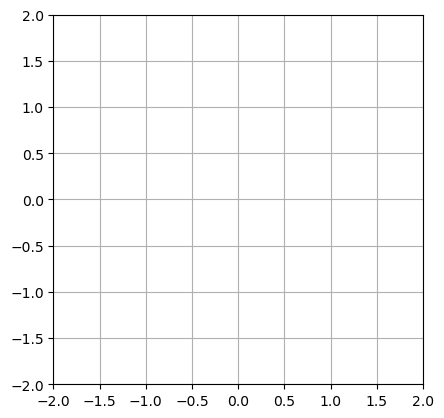

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(-(L1+L2), L1+L2)
ax.set_ylim(-(L1+L2), L1+L2)
ax.set_aspect('equal')
ax.grid()

In [13]:
locus, = ax.plot([], [], 'r-', linewidth=2)
line, = ax.plot([], [], 'o-', linewidth=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

xlocus, ylocus = [], []
def animate(data):
    t, x1, y1, x2, y2 = data
    
    xlocus.append(x2)
    ylocus.append(y2)
    
    locus.set_data(xlocus, ylocus)
    line.set_data([0, x1, x], [0, y1, y2])
    time_text.set_text(time_template % (t))

In [14]:
ani = FuncAnimation(fig, animate, gen, interval=50, repeat=True)

plt.show()

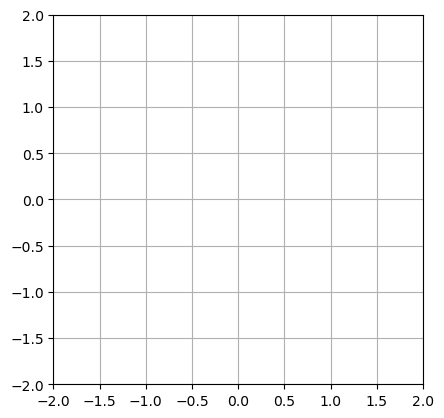

In [10]:
g = 9.8
L1 = 1.0
L2 = 1.0
M1 = 1.0
M2 = 1.0

def eom(t, state):
    
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    
    delta = state[2] - state[0]
    den1 = (M1+M2)*L1 -M2*L1*cos(delta)*cos(delta)
    dydx[1] = ((M2*L1*(state[1]**2)*sin(delta)*cos(delta) + M2*g*sin(state[2])*cos(delta) + M2*L2*(state[3]**2)*sin(delta) - (M1+M2)*g*sin(state[0])) / den1)
    
    dydx[2] = state[3]
    
    den2 = (L2/L1)*den1
    dydx[3] = ((-M2*L2*(state[3]**2)*sin(delta)*cos(delta) + (M1+M2)*g*sin(state[0])*cos(delta) - (M1+M2)*L1*(state[1]**2)*sin(delta)-(M1+M2)*g*sin(state[2])) / den2)

    return dydx

t_span = [0,20]
dt = 0.05
t = np.arange(t_span[0], t_span[1], dt)

th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0
state = np.radians([th1, w1, th2, w2])

sol = solve_ivp(eom, t_span, state, t_eval=t)
y = sol.y

def gen():
    for tt, th1, th2 in zip(t, y[0,:], y[2,:]):
        x1 = L1*sin(th1)
        y1 = -L1*cos(th1)
        x2 = L2*sin(th2) + x1
        y2 = -L2*cos(th2) + y1
        
        yield tt, x1, y1, x2, y2
        
fig, ax = plt.subplots()
ax.set_xlim(-(L1+L2), L1+L2)
ax.set_ylim(-(L1+L2), L1+L2)
ax.set_aspect('equal')
ax.grid()

locus, = ax.plot([], [], 'r-', linewidth=2)
line, = ax.plot([], [], 'o-', linewidth=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

xlocus, ylocus = [], []
xlocus1, ylocus1 = [], []
def animate(data):
    t, x1, y1, x2, y2 = data
    
    xlocus.append(x2)
    ylocus.append(y2)
    xlocus1.append(x1)
    ylocus1.append(y1)
    
    locus.set_data(xlocus, ylocus)
    locus.set_data(xlocus1, ylocus1)
    line.set_data([0, x1, x2], [0, y1, y2])
    time_text.set_text(time_template % (t))
    
locus, = ax.plot([], [], 'r-', linewidth=2)
line, = ax.plot([], [], 'o-', linewidth=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


    
ani = FuncAnimation(fig, animate, gen, interval=50, repeat=True)

plt.show()

ani.save('pendulum1.gif', writer='pillow', fps=15)


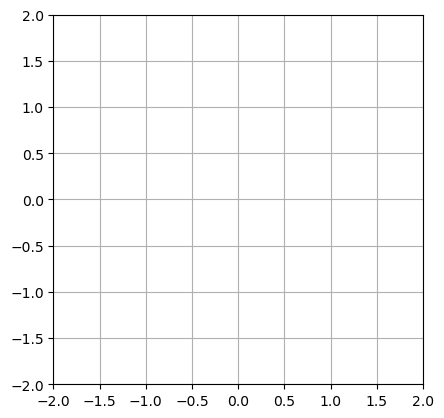

KeyboardInterrupt: 

In [4]:
from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 1.0  # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum  in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    delta = state[2] - state[0]
    den1 = (M1+M2) * L1 - M2 * L1 * cos(delta) * cos(delta)
    dydx[1] = ((M2 * L1 * state[1] * state[1] * sin(delta) * cos(delta)
                + M2 * G * sin(state[2]) * cos(delta)
                + M2 * L2 * state[3] * state[3] * sin(delta)
                - (M1+M2) * G * sin(state[0]))
               / den1)

    dydx[2] = state[3]

    den2 = (L2/L1) * den1
    dydx[3] = ((- M2 * L2 * state[3] * state[3] * sin(delta) * cos(delta)
                + (M1+M2) * G * sin(state[0]) * cos(delta)
                - (M1+M2) * L1 * state[1] * state[1] * sin(delta)
                - (M1+M2) * G * sin(state[2]))
               / den2)

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.set_aspect('equal')
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template % (i*dt))
    return line, time_text


ani = animation.FuncAnimation(fig, animate, range(1, len(y)),
                              interval=dt*1000, blit=True, init_func=init)
plt.show()

ani.save('pendulum.gif', writer='pillow', fps=15)